In [1]:
from funcs.notebook import *
from altaipony.ffd import FFD
import matplotlib.pyplot as plt
from datetime import date

today = date.today()
tstamp = today.strftime("%Y_%m_%d")

In [2]:
# Load data and select the final vetted flares

# Sector 1
aumic1 = pd.read_csv("../results/2021_02_18_AUMic_flares_1.csv")
aumic1 = aumic1[(aumic1.final==1) & (aumic1["real?"]==1)]

# Sector 27
aumic27 = pd.read_csv("../results/2021_02_11_AUMic_flares_27.csv")
aumic27 = aumic27[(aumic27.final==1) & (aumic27["real?"]==1)]

# Both Sectors
aumic = pd.concat([aumic1, aumic27])

NumExpr defaulting to 8 threads.


In [3]:
aumic1

,istart,istop,cstart,cstop,tstart,tstop,ed_rec,ed_rec_err,ampl_rec,dur,total_n_valid_data_points,ID,qcs,mission,tstamp,dur_detrend,lc_n,real?,note,final
6,1509,1519,71983,71993,1327.437532,1327.451421,0.661332,0.038413,0.001381,0.013889,18094,AU Mic,1,TESS,18_02_2021_14_40_23,8.047532,0,1.0,NaN,1.0
7,1532,1539,72006,72013,1327.469477,1327.479199,0.659758,0.044819,0.001441,0.009722,18094,AU Mic,1,TESS,18_02_2021_14_40_23,8.047532,0,1.0,NaN,1.0
8,1818,1827,72313,72322,1327.895864,1327.908364,1.669144,0.039894,0.003435,0.012500,18094,AU Mic,1,TESS,18_02_2021_14_40_23,8.047532,0,1.0,NaN,1.0
9,1997,2004,72492,72499,1328.144475,1328.154197,0.923981,0.045494,0.002392,0.009722,18094,AU Mic,1,TESS,18_02_2021_14_40_23,8.047532,0,1.0,NaN,1.0
11,2254,2278,72751,72775,1328.504196,1328.537529,14.728960,0.035002,0.025630,0.033333,18094,AU Mic,1,TESS,18_02_2021_14_40_23,8.047532,0,1.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,10446,10461,82015,82030,1341.370714,1341.391547,0.801417,0.042095,0.001267,0.020833,18094,AU Mic,1,TESS,18_02_2021_17_05_35,8.047532,0,1.0,gradual flare,1.0
120,10871,10891,82452,82472,1341.977643,1342.005420,0.821241,0.034584,0.001806,0.027777,18094,AU Mic,1,TESS,18_02_2021_17_07_05,8.047532,0,1.0,long tail,1.0
121,13163,13177,84782,84796,1345.213665,1345.233109,0.823544,0.064425,0.000785,0.019444,18094,AU Mic,1,TESS,18_02_2021_17_08_34,8.047532,0,1.0,gradual flare,1.0
122,13375,13456,84994,85075,1345.508101,1345.620598,12.870926,0.034926,0.006680,0.112497,18094,AU Mic,1,TESS,18_02_2021_17_10_50,8.047532,0,1.0,long tail,1.0


In [5]:
with open('../results/values/tesslum_aumic.txt') as f:
    lines = f.readlines()
tesslum = float(lines[0])
tesslum

2.3297917329758228e+31

In [6]:
simple_ffd1 = FFD(f=aumic1, tot_obs_time=aumic1.total_n_valid_data_points.iloc[0] / 60 / 24 * 2)
simple_ffd27 = FFD(f=aumic27, tot_obs_time=aumic27.total_n_valid_data_points.iloc[0] / 60 / 24 / 3)

Setting ED with new values, size 75.
Setting frequency values with new values, size 75.
Setting frequency adjusted count values with new values, size 75.
Setting ED with new values, size 114.
Setting frequency values with new values, size 114.
Setting frequency adjusted count values with new values, size 114.


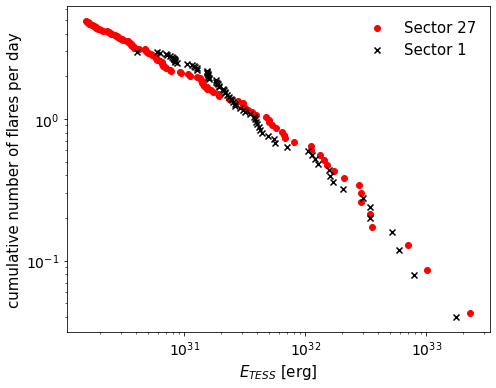

In [8]:
%matplotlib inline
ed1, freq1, counts1 = simple_ffd1.ed_and_freq()
ed27, freq27, counts27 = simple_ffd27.ed_and_freq()
plt.figure(figsize=(7, 5.5))
plt.scatter(ed27 * tesslum, freq27, c="r", marker="o", label="Sector 27")
plt.scatter(ed1 * tesslum, freq1, c="k", marker="x", label="Sector 1")
plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$E_{TESS}$ [erg]", fontsize=15)
plt.ylabel("cumulative number of flares per day", fontsize=15)
plt.legend(frameon=False, loc=1, fontsize=15)
plt.tight_layout()
plt.savefig(f"../results/plots/{tstamp}_ffd.png", dpi=300)
plt.savefig(f"../../../002_writing/aumic-flaring-spi-draft/figures/ffd.png", dpi=300);